In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Analisi dei dati

In [3]:
#visualizzazione delle prime righe del train
train.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95,0
1,68.0,1,157,1,60,0,208000.0,1.00,140,0,0,237,0
2,68.0,1,577,0,25,1,166000.0,1.00,138,1,0,43,1
3,50.0,0,2522,0,30,1,404000.0,0.50,139,0,0,214,0
4,53.0,0,56,0,50,0,308000.0,0.70,135,1,1,231,0


In [4]:
#visualizzazione della lista delle feature
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
train.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,61.760911,0.418848,580.560209,0.397906,37.801047,0.376963,257237.541623,1.414503,136.465969,0.654450,0.319372,130.193717,0.303665
std,12.309097,0.494667,1000.309497,0.490752,11.323111,0.485899,87310.444025,1.063606,4.560430,0.476797,0.467459,76.675867,0.461048
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,53.000000,0.000000,109.500000,0.000000,30.000000,0.000000,210500.000000,0.900000,134.000000,0.000000,0.000000,73.500000,0.000000
50%,60.000000,0.000000,233.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302500.000000,1.400000,139.000000,1.000000,1.000000,200.500000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.000000,533000.000000,9.000000,146.000000,1.000000,1.000000,285.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       191 non-null    float64
 1   anaemia                   191 non-null    int64  
 2   creatinine_phosphokinase  191 non-null    int64  
 3   diabetes                  191 non-null    int64  
 4   ejection_fraction         191 non-null    int64  
 5   high_blood_pressure       191 non-null    int64  
 6   platelets                 191 non-null    float64
 7   serum_creatinine          191 non-null    float64
 8   serum_sodium              191 non-null    int64  
 9   sex                       191 non-null    int64  
 10  smoking                   191 non-null    int64  
 11  time                      191 non-null    int64  
 12  DEATH_EVENT               191 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 19.5 KB


In [7]:
#verifico se ci sono valori nulli
pd.isnull(train).sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
train.sample(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
177,49.0,0,789,0,20,1,319000.00,1.10,136,1,1,55,1
182,65.0,0,198,1,35,1,281000.00,0.90,137,1,1,146,0
18,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,185,0
78,65.0,1,68,1,60,1,304000.00,0.80,140,1,0,79,0
172,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
126,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
115,65.0,0,56,0,25,0,237000.00,5.00,130,0,0,207,0
128,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
179,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78,0
99,58.0,1,400,0,40,0,164000.00,1.00,139,0,0,91,0


In [9]:
train.shape

(191, 13)

In [10]:
for item in train.columns:
    print(item)
    print (train[item].unique())

age
[60.    68.    50.    53.    82.    65.    70.    55.    75.    45.
 94.    72.    43.    85.    69.    80.    40.    52.    58.    63.
 59.    60.667 95.    62.    46.    42.    57.    90.    73.    44.
 51.    64.    61.    86.    56.    81.    54.    87.    41.    66.
 78.    49.    67.    79.    48.   ]
anaemia
[0 1]
creatinine_phosphokinase
[  96  157  577 2522   56  855  118  582 1846   69  572 1896  245  156
 3964   91  203  257  211  395 1202 2017  358 5882 1419  553  244  113
  191  132  160   66 2413  129 1548  233 1021  121   88   93  193   95
   47  109  111  707   70 1820  235  615   23  910  379  320 2261  176
  125   63  151   90  212  478  104  371  281  618  207  168  122   64
   68  196  115  898  337   61  326  246  166   59  776  514  748   97
  336   57  400  981 1767 7861  446  200   62  308  253  127   80   84
   60 2656   99  135  171   81 4540  250  110  231  427  318  149  185
  148  161   52   72   86  224  897 2794 2281  144  167 1185  112  248
  102  14

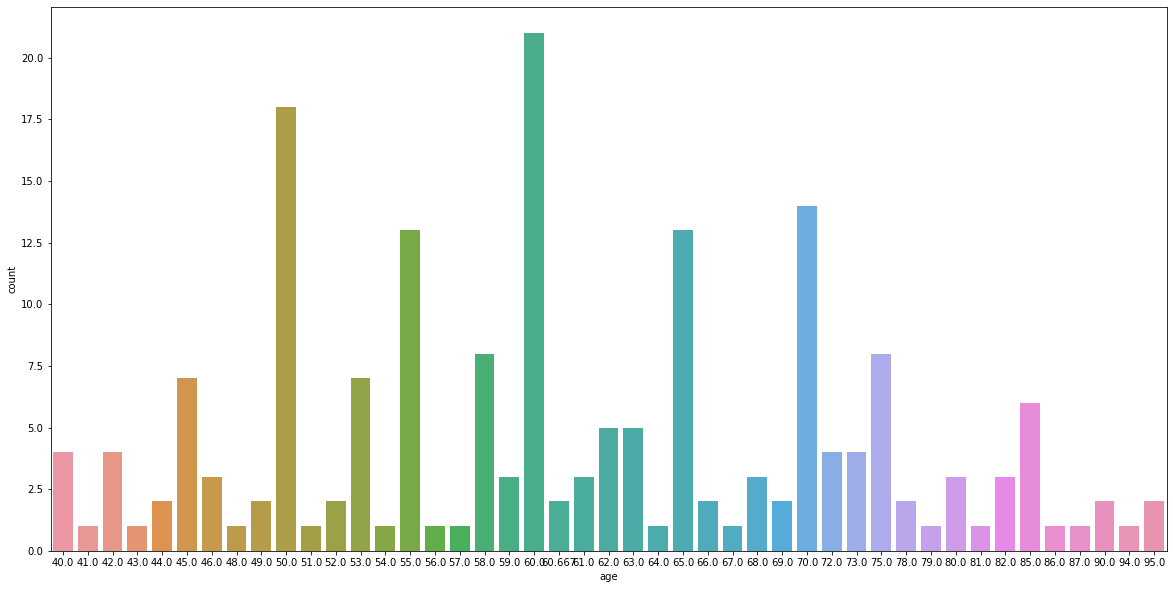

In [11]:
#stampa dei pazienti raggruppati per età
plt.figure(figsize=(20,10))
sns.countplot(x=train["age"])
plt.show()

##### si nota come i pazienti più frequenti hanno un'età pari a 60 anni 

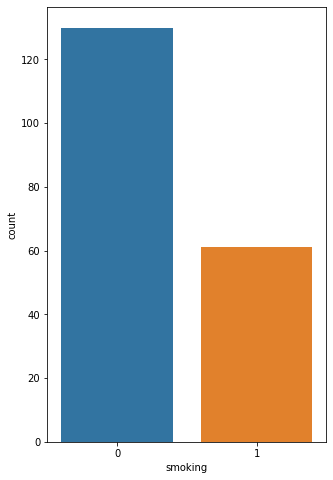

In [12]:
#stampa dei pazienti raggruppati per fumatori e non fumatori
plt.figure(figsize=(5,8))
sns.countplot(x=train["smoking"])
plt.show()

##### si nota come i pazienti non fumatori sono la maggioranza


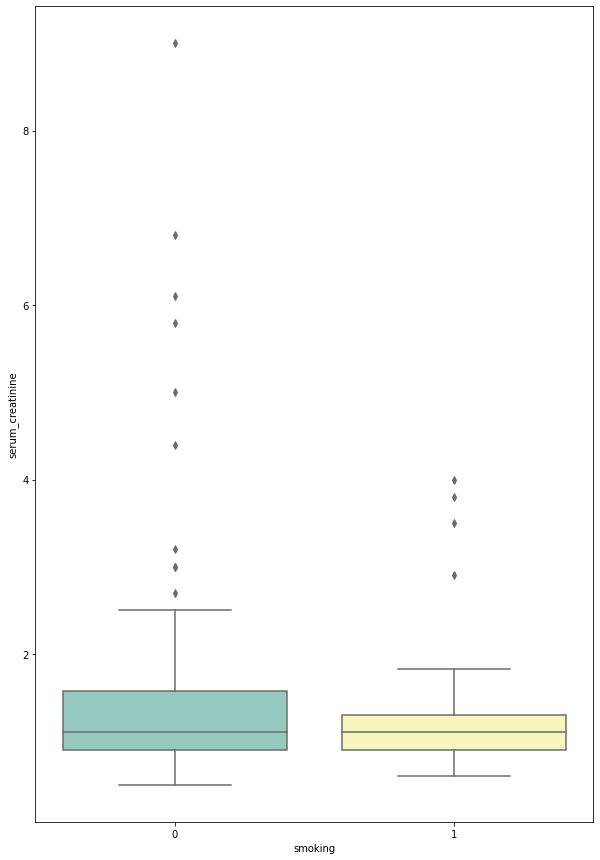

In [13]:
#verifico se esiste una correlazione tra l'essere un paziente fumatore e il livello di serum_creatinine
plt.figure(figsize=(10, 15))
sns.boxplot(x='smoking',y='serum_creatinine',data=train, palette='Set3')
plt.show()

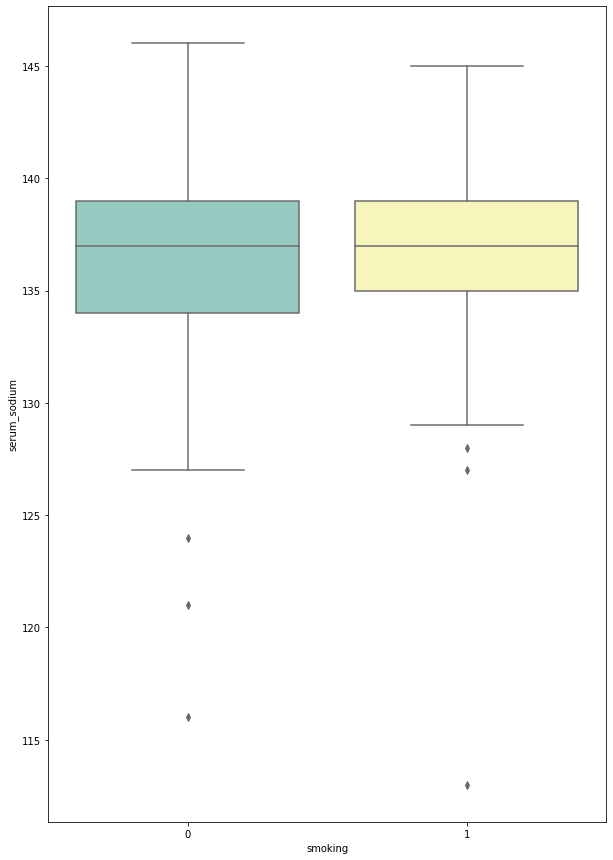

In [14]:
#verifico se esiste una correlazione tra l'essere un paziente fumatore e il livello di serum_sodium
plt.figure(figsize=(10, 15))
sns.boxplot(x='smoking',y='serum_sodium',data=train, palette='Set3')
plt.show()

### Si utilizzano le heat map per verificare le correlazioni tra le varie features e la colonna 'DEATH_EVENT'. Una correlazione molto bassa ci suggerisce di eliminare la colonna. Utilizziamo le heat map anche per verificare eventuali correlazioni tra feature

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def heat_map():
    correlation = train.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix')
    plt.title('Correlation between different features')

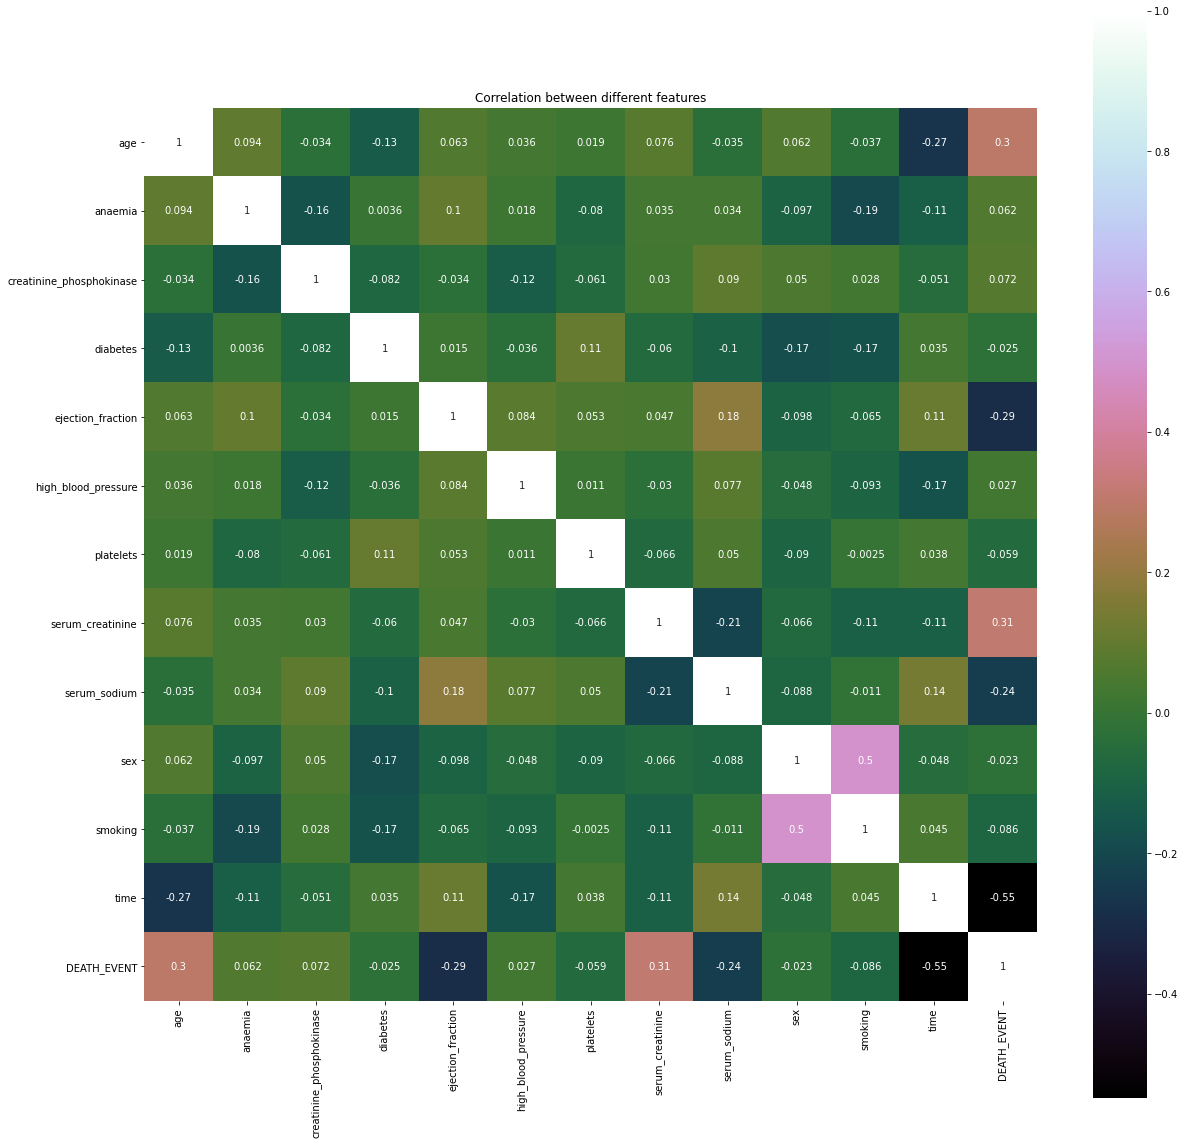

In [16]:
heat_map()

### Venogno visualizzati dei countplot e dei kdeplot per vedere le relazioni tra alcune feature e la colonna 'DEATH_EVENT'. Le feature non ritenute significative allora potranno non essere considerate (droppando la colonna).

<AxesSubplot:xlabel='anaemia', ylabel='count'>

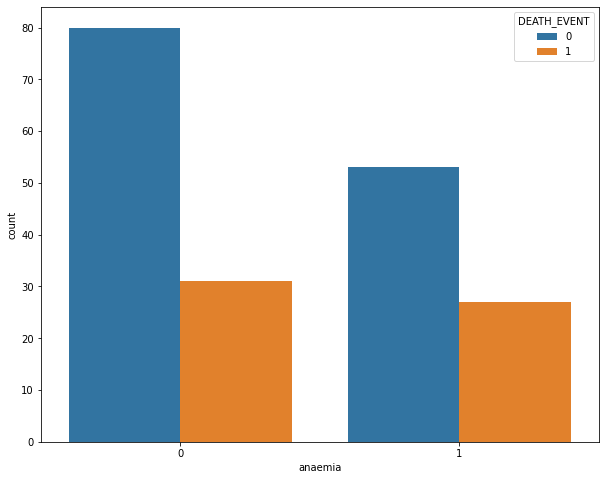

In [17]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='anaemia', hue = 'DEATH_EVENT',data = train)

<AxesSubplot:xlabel='sex', ylabel='count'>

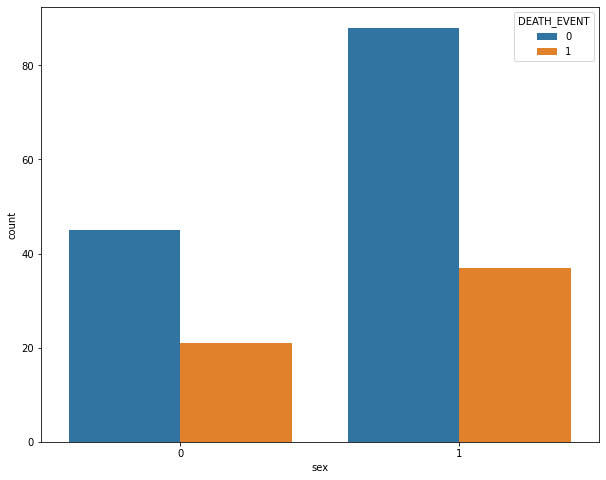

In [18]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='sex', hue = 'DEATH_EVENT',data = train)

<AxesSubplot:xlabel='smoking', ylabel='count'>

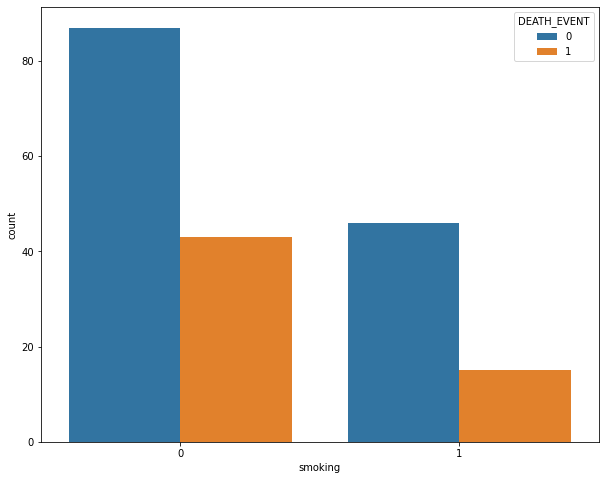

In [19]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='smoking', hue = 'DEATH_EVENT',data = train)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

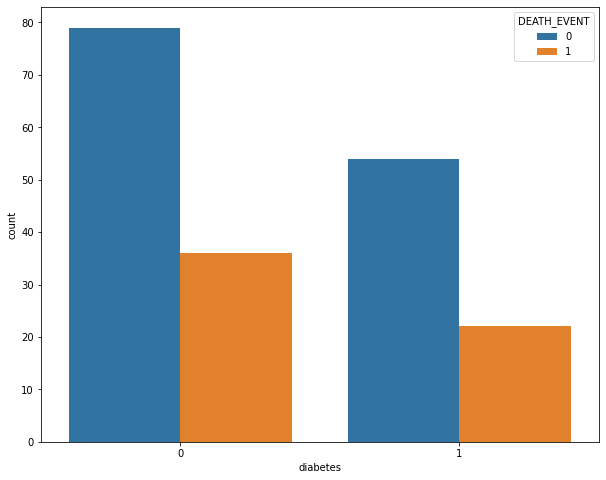

In [20]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='diabetes', hue = 'DEATH_EVENT',data = train)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

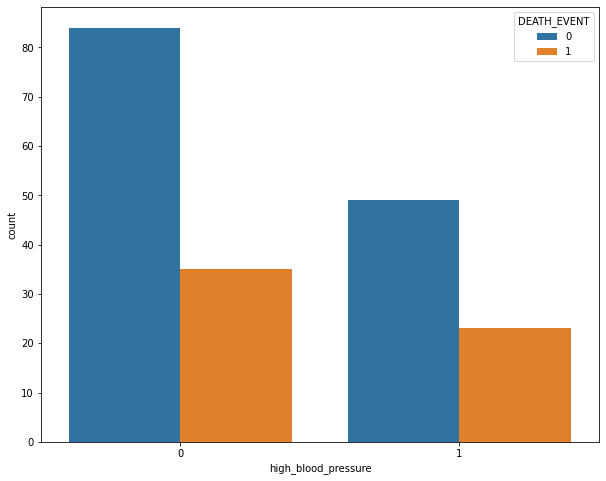

In [21]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='high_blood_pressure', hue = 'DEATH_EVENT',data = train)

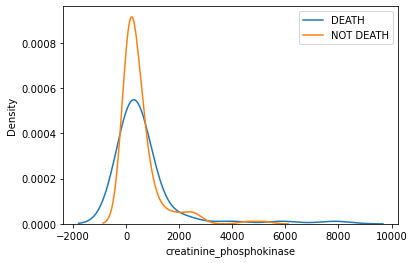

In [22]:
sns.kdeplot(train.creatinine_phosphokinase[train.DEATH_EVENT==1])
sns.kdeplot(train.creatinine_phosphokinase[train.DEATH_EVENT==0])
plt.legend(["DEATH", "NOT DEATH"])
plt.xlabel("creatinine_phosphokinase")
plt.show()

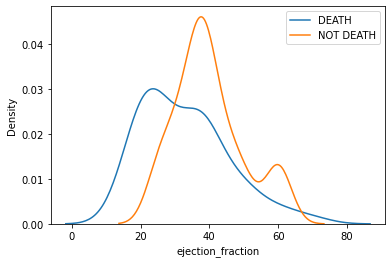

In [23]:
sns.kdeplot(train.ejection_fraction[train.DEATH_EVENT==1])
sns.kdeplot(train.ejection_fraction[train.DEATH_EVENT==0])
plt.legend(["DEATH", "NOT DEATH"])
plt.xlabel("ejection_fraction")
plt.show()

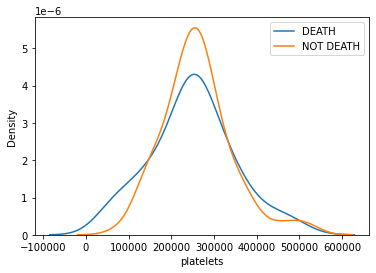

In [24]:
sns.kdeplot(train.platelets[train.DEATH_EVENT==1])
sns.kdeplot(train.platelets[train.DEATH_EVENT==0])
plt.legend(["DEATH", "NOT DEATH"])
plt.xlabel("platelets")
plt.show()

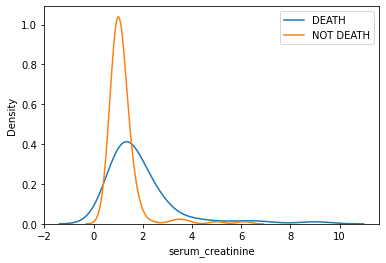

In [25]:
sns.kdeplot(train.serum_creatinine[train.DEATH_EVENT==1])
sns.kdeplot(train.serum_creatinine[train.DEATH_EVENT==0])
plt.legend(["DEATH", "NOT DEATH"])
plt.xlabel("serum_creatinine")
plt.show()

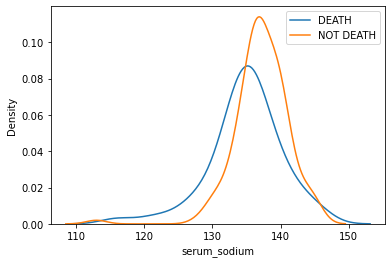

In [26]:
sns.kdeplot(train.serum_sodium[train.DEATH_EVENT==1])
sns.kdeplot(train.serum_sodium[train.DEATH_EVENT==0])
plt.legend(["DEATH", "NOT DEATH"])
plt.xlabel("serum_sodium")
plt.show()

### Costruzione e Fit dei modelli: Decision Tree e Random Forest


In [27]:
y_train = train["DEATH_EVENT"].copy()
X_train = train.drop("DEATH_EVENT",axis=1).copy()

y_test = test["DEATH_EVENT"].copy()
X_test = test.drop("DEATH_EVENT",axis=1).copy()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
trainedtree = model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Decision Tree Classifier")
print("accuracy score:", accuracy_score(y_test, pred)*100)
print("model score:", model.score(X_test, y_test))

Decision Tree Classifier
accuracy score: 85.41666666666666
model score: 0.8541666666666666


In [29]:
from sklearn.ensemble import RandomForestClassifier
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(X_train,y_train)
y_pred = randomForest_model.predict(X_test)
print("Random forest")
print("accuracy score:", accuracy_score(y_test, y_pred))
print("model score:", randomForest_model.score(X_test, y_test))

Random forest
accuracy score: 0.8333333333333334
model score: 0.8333333333333334
